# Статистический анализ данных

Изучаем популярный сервис аренды самокатов GoFast. 

**Цель проекта:** 

Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Исходные данные:**

Данные представлены о некоторых пользователях из нескольких городов, а также об их поездках.


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
* абонентская плата отсутствует;
* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.


**План исследования:** 

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения
8. Вывод



#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from math import factorial
from math import sqrt

from scipy.stats import binom, norm
 

In [2]:
users = pd.read_csv('...')

In [3]:
users.head(3)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице представленны данные о 1565 пользователях.

In [5]:
rides = pd.read_csv('...')

In [6]:
rides.head(3)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице представленны данные о 18068 поездках.

In [8]:
subscriptions = pd.read_csv('...')

In [9]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице представлено две строки, два варианта подписки с условиями

#### Шаг 2. Предобработка данных

In [11]:
# Приведем столбец date к типу даты pandas.
rides['date'] = pd.to_datetime(rides['date'])
rides['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

In [12]:
# проверим за какие года представленны данные
rides['year'] = rides['date'].dt.year
rides['year'].unique()

array([2021])

В проекте представленны данные за 2021 год

In [13]:
# Создадим новый столбец с номером месяца 
rides['month'] = rides['date'].dt.month
rides.head(3)

,user_id,distance,duration,date,year,month
0,1,4409.919140,25.599769,2021-01-01,2021,1
1,1,2617.592153,15.816871,2021-01-18,2021,1
2,1,754.159807,6.232113,2021-04-20,2021,4


In [14]:
# Проверим наличие пропущенных значений в датафрейме users
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
# Проверьте наличие дубликатов в датафреймае 
users.duplicated().sum() 

31

In [16]:
# Удалим дубликаты
users = users.drop_duplicates().reset_index(drop=True)
users.duplicated().sum() 

0

In [17]:
# Проверим наличие пропущенных значений в датафрейме riders
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
year        0
month       0
dtype: int64

In [18]:
# Проверьте наличие дубликатов в датафреймае
rides.duplicated().sum() 

0


Вывод: Проверили данные на дубликаты и пропуски. В таблице с пользователями удалили полные дубликаты, их было 31 строка.Пропусков в пользователях не было. В таблице с поездками полных дубликатов и пропусков не оказалось. 

Из анализа видно, что расстояние поездки имеет формат до шести знаков после точки, округлим расстояние:

In [19]:
temp = rides.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округлим расстояние
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

Проверим на аномалии колонку с длительностью поездок в таблице с информацией о поездках.

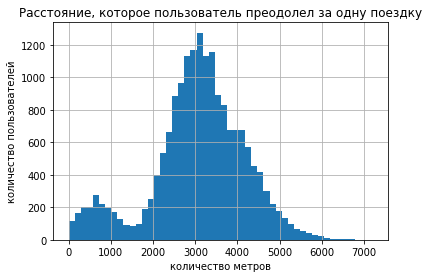

In [20]:
rides['distance'].hist(bins=50)
plt.title('Расстояние, которое пользователь преодолел за одну поездку');
plt.xlabel('количество метров');
plt.ylabel('количество пользователей')
plt.show()

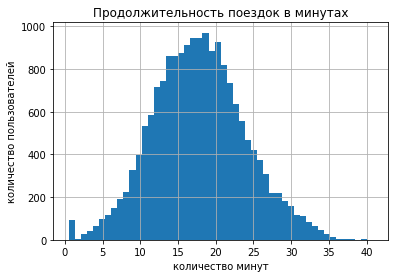

In [21]:
#  посмотрим как распределяется продолжительность поездки на графике.
rides['duration'].hist(bins=50)
plt.title('Продолжительность поездок в минутах');
plt.xlabel('количество минут');
plt.ylabel('количество пользователей')
plt.show()

На графике видно анамально короткие поездки, рассмотрим их отдельно:

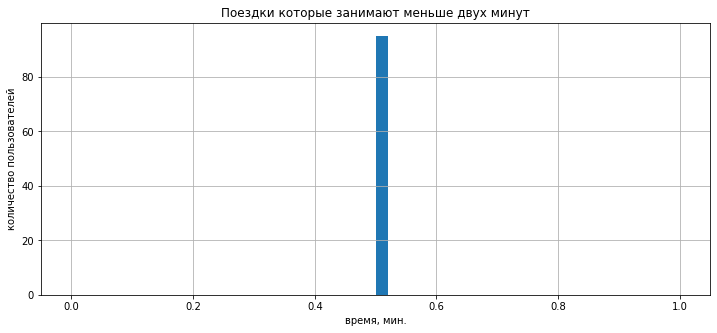

In [22]:
# Создадим таблицу с поездками которые занимают меньше двух минут
rides_small_duration = rides.query('duration <= 2')

# посмотрим как это выглядит на графике
rides_small_duration['duration'].hist(bins=50, figsize=(12,5))
plt.title('Поездки которые занимают меньше двух минут');
plt.xlabel('время, мин.');
plt.ylabel('количество пользователей')
plt.show()

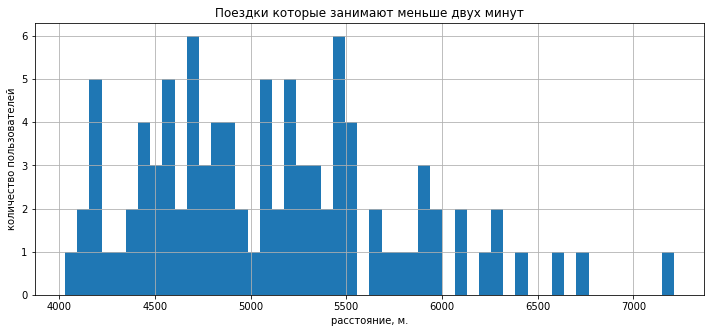

In [23]:
# посмотрим как выглядит на графике расстояние, которое пользователи презжают за 2 и менее минут
rides_small_duration['distance'].hist(bins=50, figsize=(12,5))
plt.title('Поездки которые занимают меньше двух минут');
plt.xlabel('расстояние, м.');
plt.ylabel('количество пользователей')
plt.show()

В данных обнаружили что поездки длительностью менее 1 минуы, имеют аномально большое расстояние, от 4000 метров, что не возможно. 
Не будем удалять эти строки так как потом в исследовании нам нужны будут данные об этих пользователях чтобы посчитать помесячную выручку, которую принёс каждый пользователь.

#### Шаг 3. Исследовательский анализ данных

##### частота встречаемости городов

In [24]:
# Посмотрим какие города есть в таблице
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [25]:
users_city = users.groupby('city')['user_id'].count().sort_values(ascending=False)
users_city

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: user_id, dtype: int64

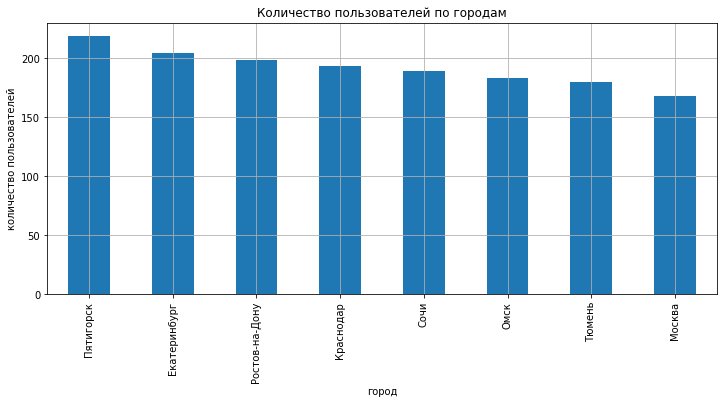

In [26]:
users_city.plot(kind='bar', grid=True, figsize=(12,5)) 
plt.title('Количество пользователей по городам');
plt.xlabel('город');
plt.ylabel('количество пользователей')
plt.show()

Больше всего пользователей из Пятигорска, потом идет Екатеренбург и Ростов-на-Дону. Меньше всего пользователей из Москвы. В общем количество пользователей по городам не сильно отличается друг от друга.

##### соотношение пользователей с подпиской и без подписки

In [27]:
# Посмотрим какие типы подписок есть в таблице
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [28]:
users_subscription = users.groupby('subscription_type', as_index=False)['user_id'].count()
users_subscription

,subscription_type,user_id
0,free,835
1,ultra,699


В данных больше информации о пользователях без подписки. 

In [29]:
users_subscription['percent'] = (users_subscription['user_id']/users_subscription['user_id'].sum()) *100
users_subscription

,subscription_type,user_id,percent
0,free,835,54.432855
1,ultra,699,45.567145


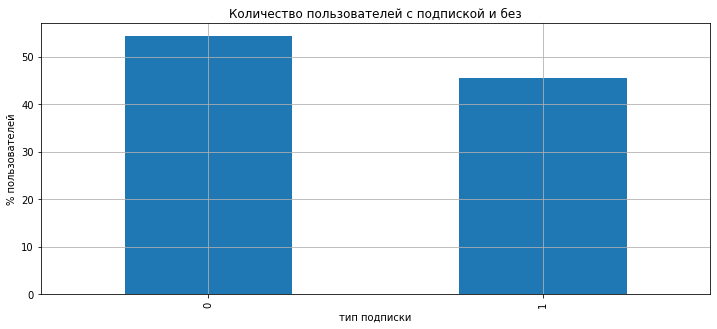

In [30]:
users_subscription['percent'].plot(kind='bar', grid=True, figsize=(12,5)) 
plt.title('Количество пользователей с подпиской и без');
plt.xlabel('тип подписки');
plt.ylabel('% пользователей')
plt.show()

##### возраст пользователей

In [31]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

В данных представлен возраст от 12 до 43, средний и медианный почти совпадают, что говорит нам об отсутствии вбросов.

In [32]:
users_age = users.groupby('age')['user_id'].count()


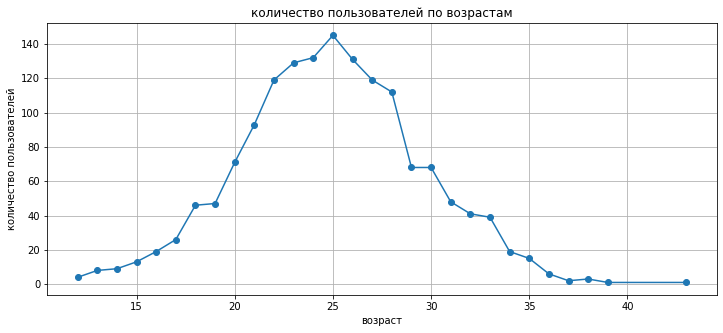

In [33]:
users_age.plot(
    style='o-', grid=True, figsize=(12,5))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.title('количество пользователей по возрастам');
plt.xlabel('возраст');
plt.ylabel('количество пользователей')
plt.show()

In [34]:
users['age'].mean()

24.903520208604956

Средний возраст пользователей 25 лет

Видно что среди пользователей некоторым менее 18 лет, именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешено с 14 лет, но при письменном согласии родителей. В датасете минимальный возраст 12 лет, это явное нарушение существующих норм.

##### расстояние, которое пользователь преодолел за одну поездку

In [35]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

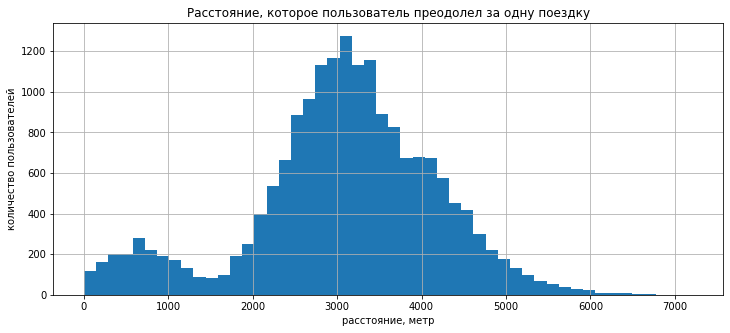

In [36]:
rides['distance'].hist(bins=50, figsize=(12,5))
plt.title('Расстояние, которое пользователь преодолел за одну поездку');
plt.xlabel('расстояние, метр');
plt.ylabel('количество пользователей')
plt.show()

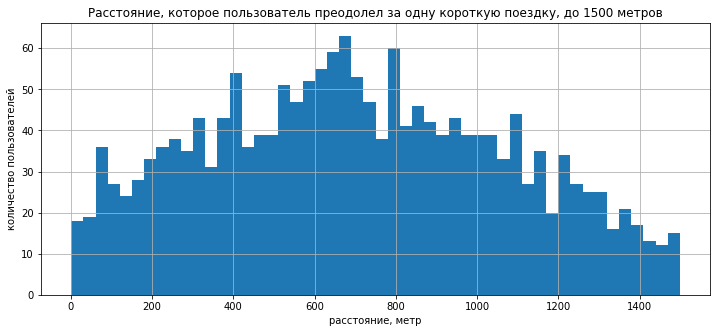

In [37]:
rides_small_distance = rides.query('distance <= 1500')
rides_small_distance['distance'].hist(bins=50, figsize=(12,5))
plt.title('Расстояние, которое пользователь преодолел за одну короткую поездку, до 1500 метров');
plt.xlabel('расстояние, метр');
plt.ylabel('количество пользователей')
plt.show()

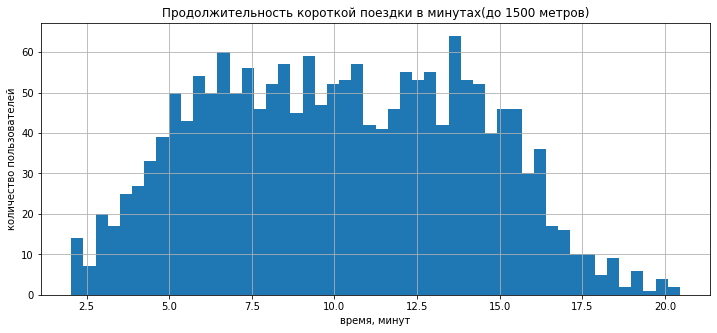

In [38]:
rides_small_distance['duration'].hist(bins=50, figsize=(12,5))
plt.title('Продолжительность короткой поездки в минутах(до 1500 метров)');
plt.xlabel('время, минут');
plt.ylabel('количество пользователей')
plt.show()

В среднем пользователь за одну поездку проезжает  3000 метров. Также есть второй максимум на коротких расстояниех, со средней около 600 метров. На короткие поездки пользователь тратит от 2.5 до 20 минут, что похоже на правду. 

##### продолжительность поездок

In [39]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

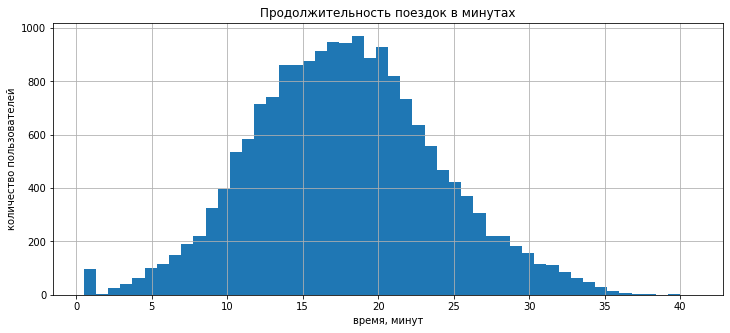

In [40]:
rides['duration'].hist(bins=50, figsize=(12,5))
plt.title('Продолжительность поездок в минутах');
plt.xlabel('время, минут');
plt.ylabel('количество пользователей')
plt.show()

Средняя продолжительность поездок 15-20 минут

Вывод: Изучили данные о продолжительности и расстоянии поездок пользователей. По графикам видна что есть один пик в продолжительных поездках это около 3000 метров и по времени 15-20 минут. Также на графике видно что есть короткие поездки с продолжительностью около 600 метров. На графики со временем поездки уже выяснили что поездка менее одной минуты является аномалией. 

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм

In [41]:
data = users.merge(rides, on='user_id', how='outer')


In [42]:
data = data.merge(subscriptions, on='subscription_type', how='outer')
data.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021,4,6,0,199


Проверим размерность датасета и пропуски после объединения.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   year               18068 non-null  int64         
 9   month              18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [44]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
year                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [45]:
data.duplicated().sum() 

0

Вывод: Объединили данные о пользователях, поездках и подписках в один датафрейм. Пролучилось 18068 строк, что соответствует количеству строк в таблице с поездками. В новой таблице так же нет пропусков и дубликатов. Что говорит нам о том что присоединение произошло удачно. 

##### Создадим ещё два датафрейма из датафрейма data:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.


In [46]:
# Создадим два датафрейма c данными о пользователях без и с подпиской
data_ultra = data[data['subscription_type'] == 'ultra'] 
data_free = data[data['subscription_type'] == 'free'] 

In [47]:
data_ultra.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021,4,6,0,199


In [48]:
data_free.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,2021,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2021,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2021,2,8,50,0


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.


Посмотрим информацию о расстоянии для пользователей без и с подпиской:

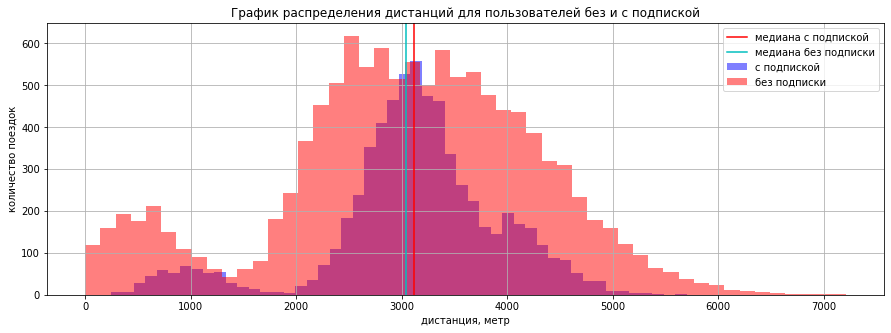

In [49]:
dis_ultra = data_ultra['distance'].mean()
dis_free= data_free['distance'].mean()

plt.figure(figsize=(15,5))
plt.hist(data_ultra['distance'],label="с подпиской", bins=50, alpha=0.5, color='blue')
plt.hist(data_free['distance'], label="без подписки", bins=50, alpha=0.5, color='red')
plt.axvline(x=dis_ultra,color='r',label="медиана с подпиской")
plt.axvline(x=dis_free,color='c',label="медиана без подписки")

plt.title('График распределения дистанций для пользователей без и с подпиской');
plt.xlabel('дистанция, метр');
plt.ylabel('количество поездок')
plt.legend()
plt.grid(True)

plt.show()

Вывод: Пользователи с подпиской в основном проезжают 3000 метров и больше. Пользователи без подписки проезжают от 2000 до 4000 метров, более широкий диапазон. Но при этом медианное значение почти овпадает.

Посмотрим информацию о времени поездок для пользователей с и без подписки:

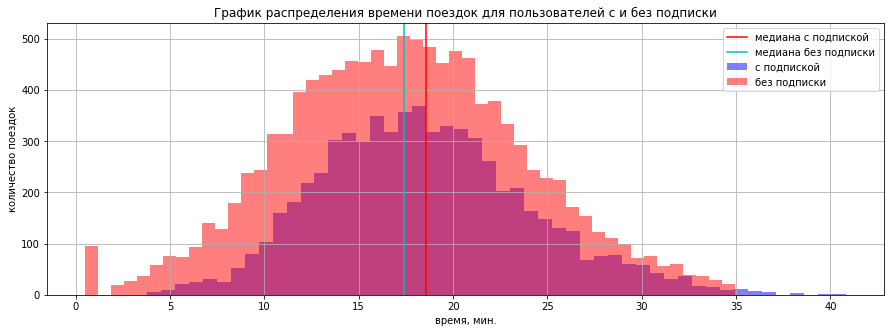

In [50]:
dur_ultra = data_ultra['duration'].mean()
dur_free= data_free['duration'].mean()

plt.figure(figsize=(15,5))
plt.hist(data_ultra['duration'],label="с подпиской", bins=50, alpha=0.5, color='blue')
plt.hist(data_free['duration'], label="без подписки", bins=50, alpha=0.5, color='red')
plt.axvline(x=dur_ultra,color='r',label="медиана с подпиской")
plt.axvline(x=dur_free,color='c',label="медиана без подписки")

plt.title('График распределения времени поездок для пользователей с и без подписки');
plt.xlabel('время, мин.');
plt.ylabel('количество поездок')
plt.legend()
plt.grid(True)

plt.show()

Вывод: Время на которее пользователь берет самокат у людей с подпиской и без примерно совпадает, медиана на уровне 17 у пользователей без подписки и около 18 с подпиской. 

Вывод:  Пользователи с подпиской в основном проезжают 3000 метров и больше.При этом среднее время 18 минут. Пользователи без подписки проезжают от 2000 до 4000 метров, более широкий диапазон, медианное значение при этом тоже в районе 3000 метров,почти совпадает с пользователями с подпиской. Время на поздки пользователи без подписки тратят около 17 минут в среднем.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [51]:
# сначала округлим длительность каждой поездки до целой минуты:
data['duration'] = np.ceil(data['duration']) 
data['duration']

0        26.0
1        16.0
2         7.0
3        19.0
4        27.0
         ... 
18063    20.0
18064    22.0
18065    19.0
18066    17.0
18067    16.0
Name: duration, Length: 18068, dtype: float64

In [52]:
# создадим датафрейм с агрегированными данными о поездках
data_rides = data.groupby(['user_id','month']).agg({'distance':('sum','count'),
                                                'duration':'sum',
                                                'distance':('sum','count'),
                                                'subscription_type':'first',
                                                'minute_price':'first',
                                                'start_ride_price':'first',
                                              'subscription_fee':'first'}).reset_index()
data_rides.columns = ['user_id','month','distance_sum','drive_count','duration_sum',
                  'subscription_type','minute_price','start_ride_price', 'subscription_fee' ]
data_rides.head(3)

,user_id,month,distance_sum,drive_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,2,42.0,ultra,6,0,199
1,1,4,754.159807,1,7.0,ultra,6,0,199
2,1,8,6723.470560,2,46.0,ultra,6,0,199


##### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [53]:
data_rides['revenue_month'] = (data_rides['start_ride_price'] * data_rides['drive_count'])\
+ (data_rides['minute_price'] * data_rides['duration_sum']) + data_rides['subscription_fee']
data_rides.head(3)

,user_id,month,distance_sum,drive_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,revenue_month
0,1,1,7027.511294,2,42.0,ultra,6,0,199,451.0
1,1,4,754.159807,1,7.0,ultra,6,0,199,241.0
2,1,8,6723.470560,2,46.0,ultra,6,0,199,475.0


#### Шаг 6. Проверка гипотез

##### Посмотрим, тратят ли пользователи с подпиской больше времени на поездки?

In [54]:
# посмотрим средие траты для пользователя с подпиской
data_ultra['duration'].mean()

18.54198516280583

In [55]:
# посмотрим средие траты для пользователя без подписки
data_free['duration'].mean()

17.39090929866399

Нулевая гипотеза звучит как «между средними значениями двух выборок нет разницы, они равны», а альтернативная — «среднее значение пользователей с подпиской больше среднего значения пользователей без подписки».

In [56]:
alpha = 0.05 # уровень статистической значимости

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.
Также это подтверждают расчеты средних для пользователей с подпиской и без. 

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Нулевая гипотеза звучит как «среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров», а альтернативная — «среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130».

Ответ: нулевая гепотеза всегда равно. Но когда мы рассматриваем односторонний тест, подразумевается меньше или равно.

In [57]:
trip_distance = 3130 # Расстояние одной поездки,оптимальное с точки зрения износа самоката

alpha = 0.05 # уровень статистической значимости
            
results = st.ttest_1samp(
    data_ultra['distance'], 
    trip_distance, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Можно сделать вывод, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. То есть пользователи с подпиской выгодны компании еще и с точки зрения износа самоката. 

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [58]:
#сначала найдем в таблице с выручкой по месяцам пользователей с подпиской:
data_rides_ultra = data_rides.query('subscription_type == "ultra"')
data_rides_ultra.head(3)

,user_id,month,distance_sum,drive_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,revenue_month
0,1,1,7027.511294,2,42.0,ultra,6,0,199,451.0
1,1,4,754.159807,1,7.0,ultra,6,0,199,241.0
2,1,8,6723.470560,2,46.0,ultra,6,0,199,475.0


In [59]:
#найдем пользователей без подпиской:
data_rides_free = data_rides.query('subscription_type == "free"')
data_rides_free.head(3)

,user_id,month,distance_sum,drive_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,revenue_month
4533,700,1,2515.690719,1,15.0,free,8,50,0,170.0
4534,700,2,13446.659764,5,89.0,free,8,50,0,962.0
4535,700,3,3798.334905,1,19.0,free,8,50,0,202.0


Нулевая гипотеза звучит как «помесячная выручка от пользователей с подпиской равна помесячной выручки от пользователей без подписки», а альтернативная — «среднее значение помесячной выручки от пользователей с подпиской  больше помесячной выручки от пользователей без подпиской».

In [60]:
alpha = 0.05 # уровень статистической значимости

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_rides_ultra['revenue_month'], data_rides_free['revenue_month'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Можно сказать, что среднее значение помесячной выручки от пользователей с подпиской  больше помесячной выручки от пользователей без подпиской

#### Шаг 7. Распределения

##### Задача, нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 



In [61]:
p = 0.1 # вероятность продления подписки
alpha = 0.05 # вероятность выполнить план
target_x = 100 #минимальное количество успехов

#поиск минимального n
n=1000 #начинаем перебирать с этого сначения
while binom.cdf(target_x - 1,n,p) > alpha:
    n+=1 #увиличиваем n пока вероятность не станет <= 5%

n

1161

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


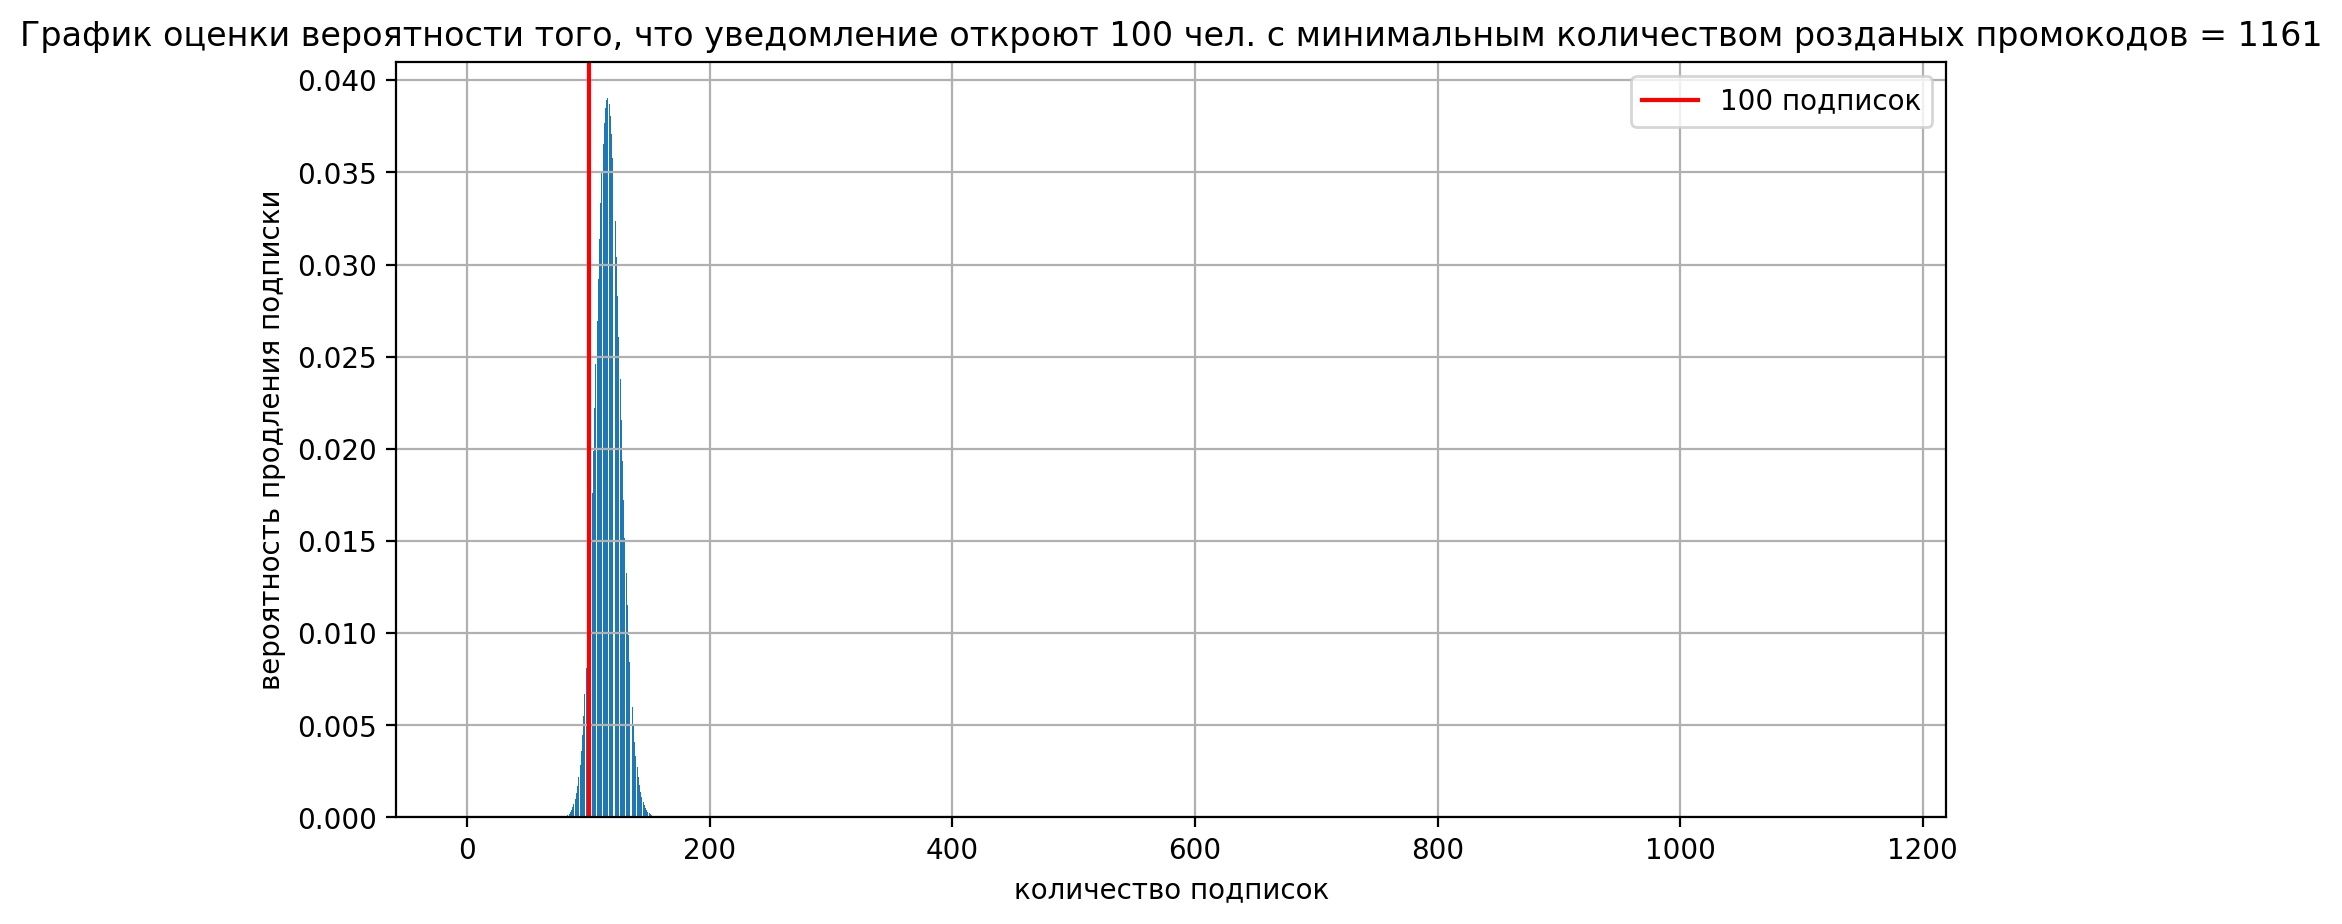

In [62]:
#построим график
p = 0.1 # вероятность продления подписки
n = 1161 # минимальное количество розданых промокодов

distr = [] # создадим список distr, в котором будут хранится значения распределения

for k in range(0, n + 1):
    
    prob = binom.pmf(k, n, p)
    distr.append(prob)

#построим распределение вероятностей
plt.figure(figsize=(10,5), dpi = 200)
plt.bar(range(0,n+1),distr) 
plt.axvline(x=target_x, color='r', label="100 подписок")

plt.title('График оценки вероятности того, что уведомление откроют 100 чел. с минимальным количеством розданых промокодов = 1161');
plt.xlabel('количество подписок');
plt.ylabel('вероятность продления подписки')
plt.legend()
plt.grid(True)

plt.show()

Чтобы как минимум 100 существующих клиентов продлили подписку, нужно чтобы минимальное количество розданых промокодов было равно 1161, тогда вероятность не выполнить план будет примерно 5 %. 

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [63]:

# задаём параметры биномиального распределения
p = 0.4 # вероятность открыть уведомления
n = 1000000 # минимальное количество разосланных уведомлений

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399,5 тыс.
result = distr.cdf(399500)
print(result)



0.15371708296369768


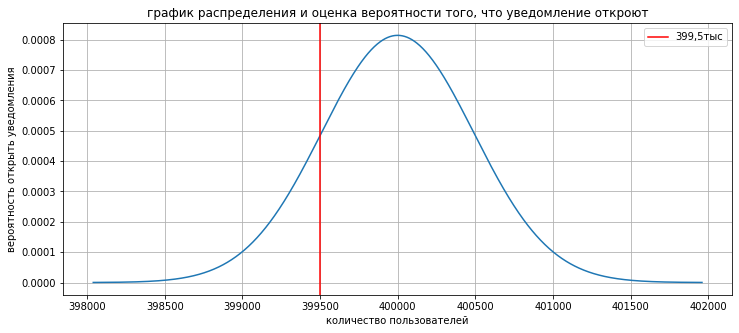

In [64]:
# задаём параметры биномиального распределения
p = 0.4 # вероятность открыть уведомления
n = 1000000 # минимальное количество разосланных уведомлений

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём диапазон значений
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

#построение графиков
plt.figure(figsize=(12,5))
plt.plot(x, y)
plt.axvline(399500, color='r', label="399,5тыс")

plt.title('график распределения и оценка вероятности того, что уведомление откроют');
plt.xlabel('количество пользователей');
plt.ylabel('вероятность открыть уведомления')

plt.legend()
plt.grid(True)
plt.show()


Вероятность что уведомление откроют не более 399,5 тыс. пользователей при таком распределении равна 
15%

# Вывод:

Изучили данные популярного сервиса аренды самокатов GoFast. Данные представленны в виде выборки пользователей и поездок которые они совершили.

Проверили данные на дубликаты и пропуски. В таблице с пользователями удалили полные дубликаты, их было 31 строка.Пропусков в пользователях не было. В таблице с поездками полных дубликатов и пропусков не оказалось. 

В данных 55% пользователей без подписки и 45% с подпиской. Данные представленны по 8 городам: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар, Пятигорск, Екатеринбург, Сочи. Средний возраст пользователей 25 лет. 

Изучили данные о продолжительности и расстоянии поездок пользователей. Увидели что есть один пик в продолжительных поездках это около 3000 метров и по времени 15-20 минут. Также есть короткие поездки с продолжительностью около 600 метров. 
На графики со временем поездки обнаружили что поездки длительностью менее 1 минуы, имеют аномально большое расстояние, от 4000 метров, что не возможно. 
Не стали удалять эти строки так как потом в исследовании нам нужны будут данные об этих пользователях чтобы посчитать помесячную выручку, которую принёс каждый пользователь. В общем средняя продолжительность поездок 15-20 минут у всех категорий пользователей. 


Сделали вывод, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. То есть пользователи с подпиской выгодны компании еще и с точки зрения износа самоката, так как расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа.
Еще среднее значение помесячной выручки от пользователей с подпиской  больше помесячной выручки от пользователей без подпиской. 
Следовательно компании выгодны пользователи с подпиской. 

Чтобы увеличить количество таких пользователей, нужно проводить различные акции. 


В работе представленны две акции направленные на увелечение подписок. 
Первая акция с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. Провели расчеты и сделали вывод, чтобы получить 100 и больше пользователей нужно отослать как минимум 1161 промокодов, тогда вероятность не выполнить план будет примерно 5 %. 
Следующая акция с рассылкой клиентам push-уведомления в мобильном приложении. Такие уведомления могут помочь проинформировать клиентов о скидках и акциях. Провели расчеты и сделали вывод что если компания разашлет 1млн уведомлений пользователям, то с 15% вертностью уведомление откроют не более  399,5 тыс. пользователей. 
